# Space Missions


### about dataset: 

All **space missions from 1957 to August 2022**, including details on the location,
date, and result of the launch, the company responsible, and the name, price, 
and status of the rocket used for the mission.

- Company : name of the company
- location : the exact location of the mission
- Rocket : name of the Rocke used for mission 
- statusRocket : status of rocket ( is it Retired or active )
- country : the country 
- Date : date of mission 
- MissionStatus : is it Success	or Failure or Partial Failure or Prelaunch Failure


## Objectives

the objective is to analyze this dataset of space missions from 1957 to August 2022 to answer 
these questions and gain some insights :

  **1-How have rocket launches trended across time? Has mission success rate increased?**

  **2-Which countries have had the most successful space missions? Has it always been that way?**

  **3-Which rocket has been used for the most space missions? Is it still active?**

  **4-Are there any patterns you can notice with the launch locations**

In [2]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline


In [3]:
# read data 
df = pd.read_csv('space_missions.csv', encoding='latin-1')

In [4]:
df.head()

,Company,Location,Country,Date,Year,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,10/4/1957,1957,Sputnik 8K71PS,Sputnik-1,Retired,0,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,11/3/1957,1957,Sputnik 8K71PS,Sputnik-2,Retired,0,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,12/6/1957,1957,Vanguard,Vanguard TV3,Retired,0,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",USA,2/1/1958,1958,Juno I,Explorer 1,Retired,0,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,2/5/1958,1958,Vanguard,Vanguard TV3BU,Retired,0,Failure


In [5]:
print('Number of columns: {}'.format(df.shape[0]))
print('Number of rows : {}'.format(df.shape[1]))

Number of columns: 4630
Number of rows : 10


In [6]:
df.columns

Index(['Company', 'Location', 'Country', 'Date', 'Year', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Country        4630 non-null   object
 3   Date           4630 non-null   object
 4   Year           4630 non-null   int64 
 5   Rocket         4630 non-null   object
 6   Mission        4630 non-null   object
 7   RocketStatus   4630 non-null   object
 8   Price          1568 non-null   object
 9   MissionStatus  4630 non-null   object
dtypes: int64(1), object(9)
memory usage: 361.8+ KB


In [8]:
# drop price column because it has a lot of missing values
df.drop(['Price'], axis = 1 , inplace = True)

# Data Cleaning and EDA

In [10]:
# remove duplicates rows if there is any 
df.drop_duplicates()

,Company,Location,Country,Date,Year,Rocket,Mission,RocketStatus,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,10/4/1957,1957,Sputnik 8K71PS,Sputnik-1,Retired,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Kazakhstan,11/3/1957,1957,Sputnik 8K71PS,Sputnik-2,Retired,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,12/6/1957,1957,Vanguard,Vanguard TV3,Retired,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",USA,2/1/1958,1958,Juno I,Explorer 1,Retired,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",USA,2/5/1958,1958,Vanguard,Vanguard TV3BU,Retired,Failure
...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",USA,7/22/2022,2022,Falcon 9 Block 5,Starlink Group 3-2,Active,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",China,7/24/2022,2022,Long March 5B,Wentian,Active,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",USA,7/24/2022,2022,Falcon 9 Block 5,Starlink Group 4-25,Active,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",China,7/27/2022,2022,Zhongke-1A,Demo Flight,Active,Success


In [104]:
# let's descover the number of lunches of each company 
df_company = df['Company'].value_counts().reset_index()
df_company.columns = ['Company','Number of Launches']

df_company.head()

,Company,Number of Launches
0,RVSN USSR,1777
1,CASC,338
2,Arianespace,293
3,General Dynamics,251
4,VKS RF,216


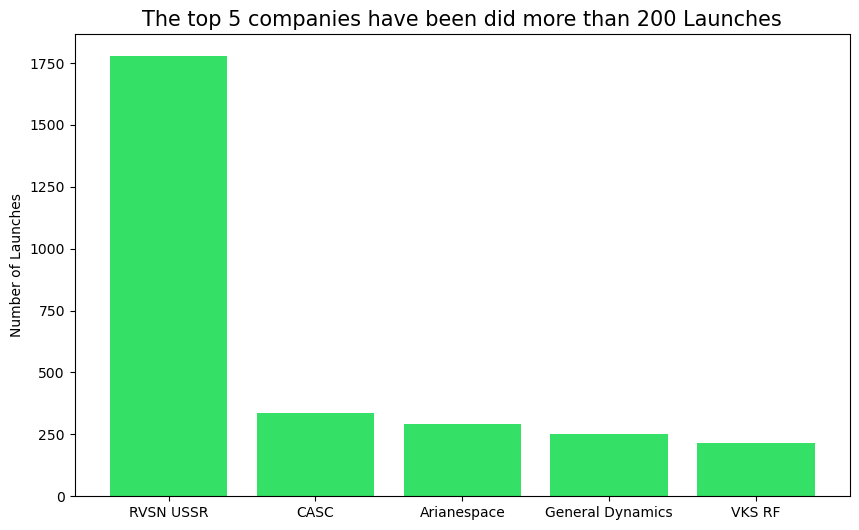

In [106]:
# Top 5  company has been did more than 200 lunches
top5 = df_company.head(5)

fig, ax = plt.subplots(figsize = (10,6))
ax.bar(top5['Company'], top5['Number of Launches'], color = '#34e065')

ax.set_title('The top 5 companies have been did more than 200 Launches',fontsize =15)
ax.set_ylabel('Number of Launches')

plt.show()

In [107]:
df_mission = df['MissionStatus'].value_counts().sort_values(ascending = False).reset_index()
df_mission.columns = ['Mission Status','Number of Launches']

df_mission

,Mission Status,Number of Launches
0,Success,4162
1,Failure,357
2,Partial Failure,107
3,Prelaunch Failure,4


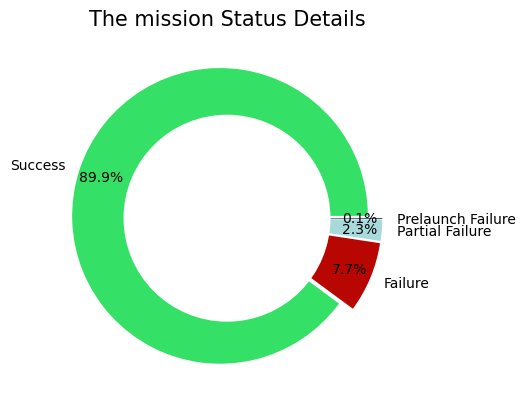

In [117]:
fig, ax = plt.subplots()
colors = ['#34e065', '#b80600', '#a8dadc','#14213d']
explode = (0.05, 0.05, 0.05, 0.05)

# Pie Chart
ax.pie(df_mission['Number of Launches'],
       colors=colors,
       labels=df_mission['Mission Status']
       ,autopct='%1.1f%%',
       pctdistance=0.85,
       explode=explode )

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()


fig.gca().add_artist(centre_circle)
ax.set_title('The mission Status Details', fontsize = 15)
plt.show()

# Some Interesting Questions

###  Q1- Which countries have had the most successful space missions

In [39]:
# Q1- Which countries have had the most successful space missions
df_success = df[df['MissionStatus'] == 'Success']
countries = df_success['Country'].value_counts().reset_index()
countries.columns = ['country', 'nbr_missions']

df_top10 = countries.head(10)

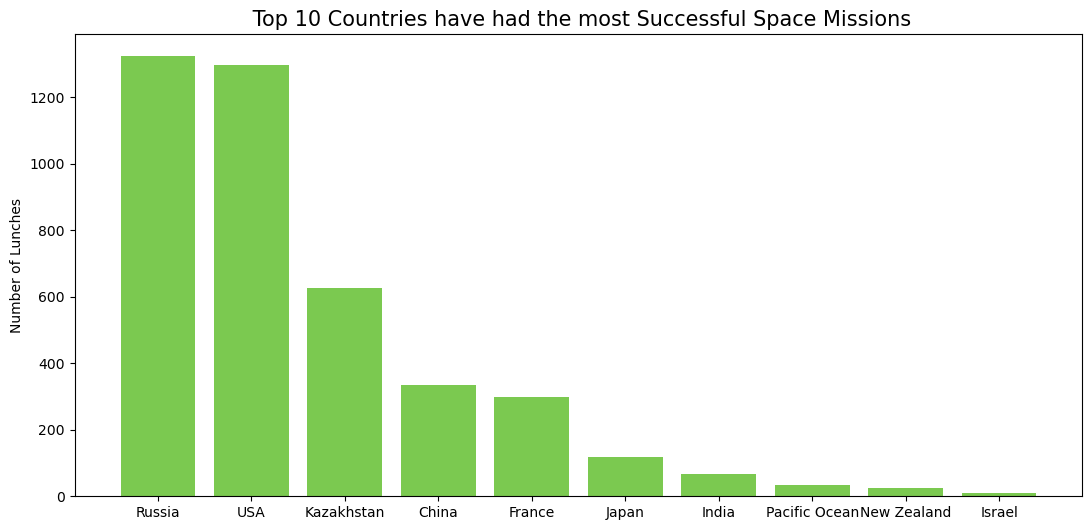

In [86]:
fig,ax =plt.subplots(figsize=(13,6))

ax.bar(df_top10['country'],df_top10['nbr_missions'], color = '#7bc950')
plt.title(' Top 10 Countries have had the most Successful Space Missions', fontsize = '15')

plt.ylabel('Number of Launches')
plt.show()

### Q2 How have rocket launches trended across time? Has mission success rate increased?

In [109]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['Date'])

# Calculate the mission success rate for each year
success_rate = df[df['MissionStatus'] == 'Success'].groupby('Year')['MissionStatus'].count() / df.groupby('Year')['MissionStatus'].count() * 100
success_rate.head()

Year
1957    66.666667
1958    21.428571
1959    40.000000
1960    48.717949
1961    61.538462
Name: MissionStatus, dtype: float64

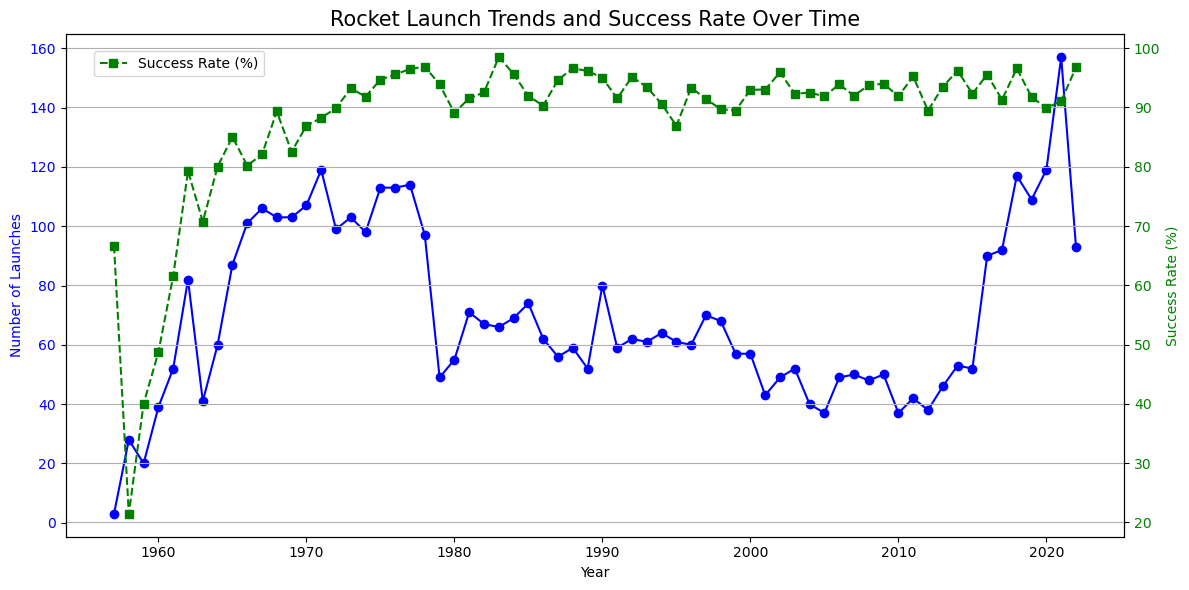

In [110]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the number of launches per year
launches_per_year = df.groupby('Year')['date'].count()
ax1.plot(launches_per_year.index, launches_per_year.values, color='b', marker='o', label='Number of Launches')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Launches', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for the success rate
ax2 = ax1.twinx()
ax2.plot(success_rate.index, success_rate.values, color='g', marker='s', linestyle='--', label='Success Rate (%)')
ax2.set_ylabel('Success Rate (%)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Add titles and legends
plt.title('Rocket Launch Trends and Success Rate Over Time',fontsize= 15)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))

# Show the plot
plt.tight_layout()
plt.show()

### Q3 which most rocket has been used for the success and Failures Missions ?

In [119]:
df_success = df[df['MissionStatus'] == 'Success']
rockets = df_success['Rocket'].value_counts().sort_values(ascending = False).reset_index().head(10)
rockets.columns = ['rocket', 'count']

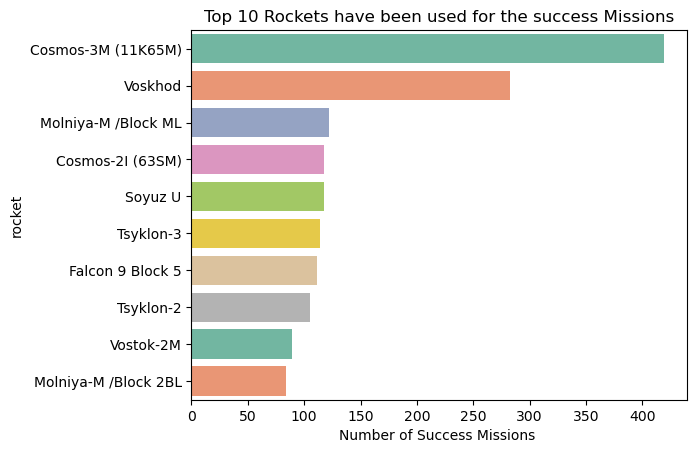

In [120]:
res = sns.barplot(x = 'count', y ='rocket', data = rockets, palette = 'Set2')
plt.title('Top 10 Rockets have been used for the success Missions')
plt.xlabel('Number of Success Missions ')


plt.show()

In [121]:
df_success = df[df['MissionStatus'] == 'Failure']
rockets = df_success['Rocket'].value_counts().sort_values(ascending = True).reset_index()
rockets.columns = ['rocket', 'count']
failures_missions = rockets[rockets['count'] < 5 ]
least10 = failures_missions.head(10)

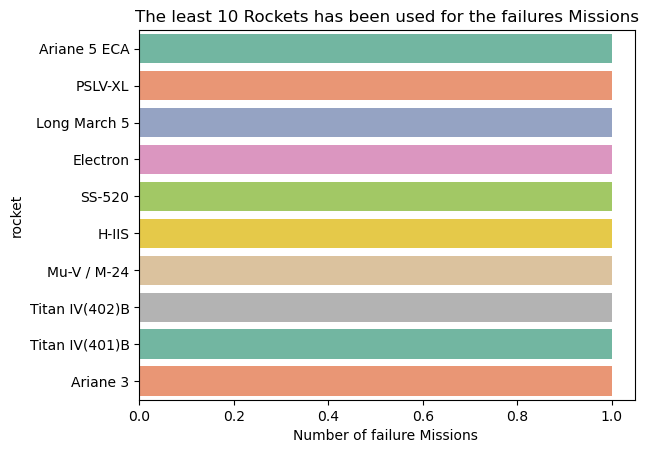

In [113]:
res = sns.barplot(x = 'count', y ='rocket', data = least10, palette = 'Set2')
plt.title('The least 10 Rockets have been used for the failures Missions')
plt.xlabel('Number of failure Missions ')


plt.show()

### Q4 which company has a good success missions and which Rocket used

In [125]:
# Q1- Which countries have had the most successful space missions
df_success = df[df['MissionStatus'] == 'Success']
companies = df_success['Company'].value_counts().reset_index()
companies.columns = ['company','successMissions']
companies.head()

,company,successMissions
0,RVSN USSR,1614
1,CASC,318
2,Arianespace,282
3,General Dynamics,203
4,VKS RF,202


In [126]:
# Calculate the mission success rate for each company
company_success_rate = df[df['MissionStatus'] == 'Success'].groupby('Company')['MissionStatus'].count() / df.groupby('Company')['MissionStatus'].count() * 100

# Find the company with the highest success rate
best_company = company_success_rate.idxmax()
best_success_rate = company_success_rate.max()

print(f"The company with the highest success rate is {best_company} with a success rate of {best_success_rate:.2f}%.")

# Find the rockets used by the best company in successful missions
best_company_successful_rockets = df[(df['Company'] == best_company) & (df['MissionStatus'] == 'Success')]['Rocket'].unique()

print(f"The rockets used by {best_company} in successful missions are:")
for rocket in best_company_successful_rockets:
    print(rocket)


The company with the highest success rate is ASI with a success rate of 100.00%.
The rockets used by ASI in successful missions are:
Scout B
Scout D1
Scout B1
Scout F1
Scout G1
